In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import pandas
import researchpy as rp
import scipy.stats as stats
import statsmodels.api as sm
import os
import yaml
from matplotlib import pyplot as plt
import numpy as np
from sklearn import preprocessing
import dataframe_image as dfi
from scipy.stats import norm

In [4]:
def calcStuff(name, df, method):            
    subset = df[['inliers', 'sharpness', 'flow', 'contrast', 'average intensity', 'percentage white pixels', 'percentage black pixels']]
    calcCorrelation(subset,name, plots_dir, method)
    

In [5]:
def makePlots(subset_scaled, name, directory):
    plt = subset_scaled.plot(xlabel='frame number', title=name)
    fig = plt.get_figure()
    fig.savefig(directory+'/plots/'+name+'.png')
    

Correlation coeffs

In [66]:
def calcCorrelation(subset_scaled, name, directory, method):
    corr = subset_scaled.corr(method='pearson').style.background_gradient(cmap='coolwarm')
    corr.set_caption(name)
    if method == 'train':
        dfi.export(corr, directory+'/corr_plots/'+name+'_corr_train.png')
    elif method == 'test':
        dfi.export(corr, directory+'/corr_plots/'+name+'_corr_test.png')

In [67]:
#directory = 'matching_interframe'
directory = 'matching_interframe'
plots_dir = os.getcwd()
extension = ('.csv')
filepaths = []
for subdir, dirs, files in os.walk(directory):
    files = sorted(files)
    for file in files:
        filepath = subdir + os.sep + file
        if filepath.endswith(extension):
            filepaths.append(filepath)
            '''
            df = pandas.read_csv(filepath)
            df = df.astype(float)
            df.rename(columns = {'blur':'sharpness'}, inplace=True)
            df.dropna(inplace=True)
            df_shuffled = df.sample(frac=1.0, replace=False, random_state=1)
            #df_shuffled = df
            midpoint = int(df_shuffled.shape[0]/2)
            train_df = df_shuffled.iloc[0:midpoint]
            test_df = df_shuffled.iloc[-midpoint:]
            name = (filepath.split('/',1)[1]).split('_stats.csv')[0].replace('/', '_')
            calcStuff(name+ ' train', train_df, method='train')
            calcStuff(name+ ' test', test_df, method='test')
            '''
df = pandas.concat([pandas.read_csv(f) for f in filepaths])
df = df.astype(float)
df.rename(columns = {'blur':'sharpness'}, inplace=True)
df.dropna(inplace=True)
name = directory.split('/')[-1]
name='all_combined'
#df_shuffled = df.sample(frac=1.0, replace=False, random_state=1)
df_shuffled = df
midpoint = int(df_shuffled.shape[0]/2)
train_df = df_shuffled.iloc[0:midpoint]
test_df = df_shuffled.iloc[-midpoint:]
calcStuff(name+ ' train', train_df, method='train')
calcStuff(name+ ' test', test_df, method='test')


[0816/144657.741763:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0816/144657.752184:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0816/144657.940403:INFO:headless_shell.cc(660)] Written to file /tmp/tmp1cvducib/temp.png.
[0816/144658.204177:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0816/144658.214454:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0816/144658.408887:INFO:headless_shell.cc(660)] Written to file /tmp/tmpi4xtfqvf/temp.png.


exos_mc0006_20220523_123903_barn_rainy
exos_mc0006_20220523_123903_grass_rainy
exos_mc0006_20220523_123903_road_rainy
exos_mc0006_20220523_232418_barn_dark
exos_mc0006_20220523_232418_grass_dark
exos_mc0006_20220523_232418_grass_normal
exos_mc0006_20220523_232418_road_dark
exos_mc0006_20220523_232418_road_normal


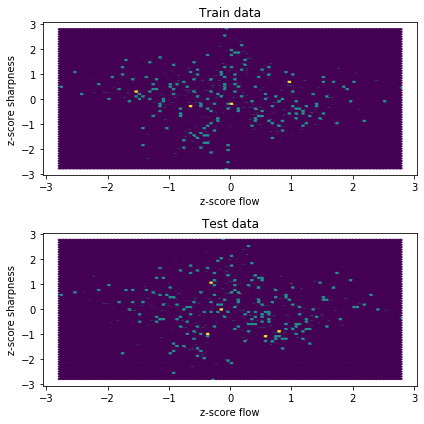

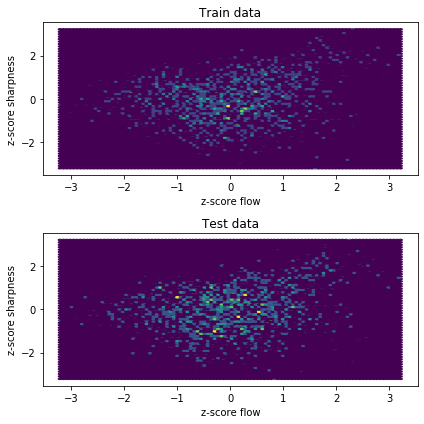

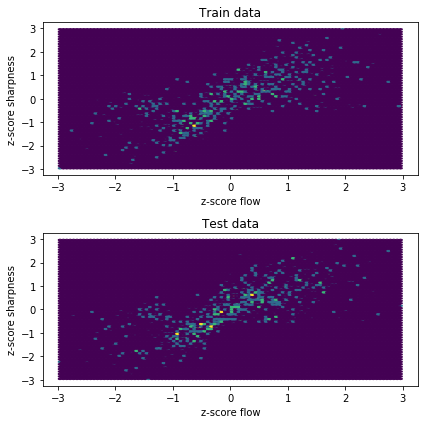

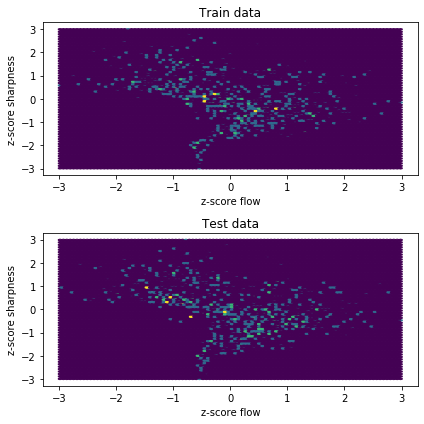

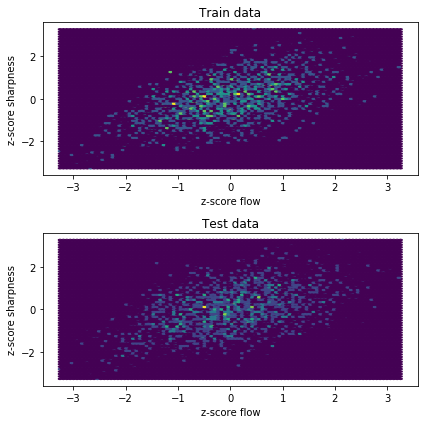

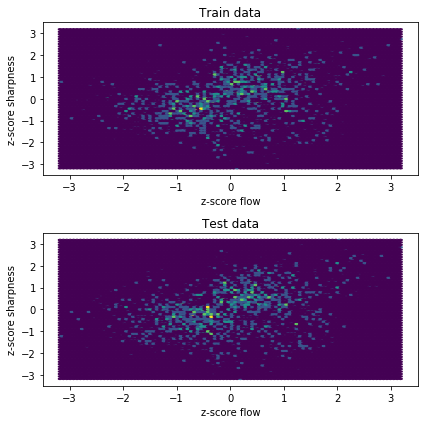

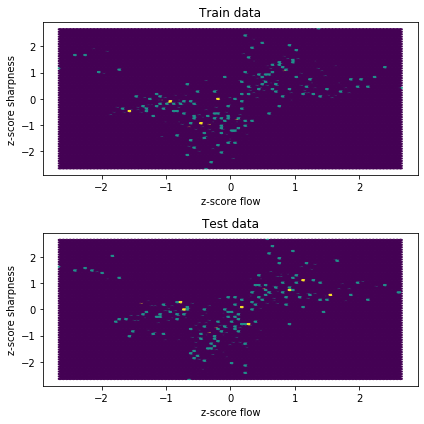

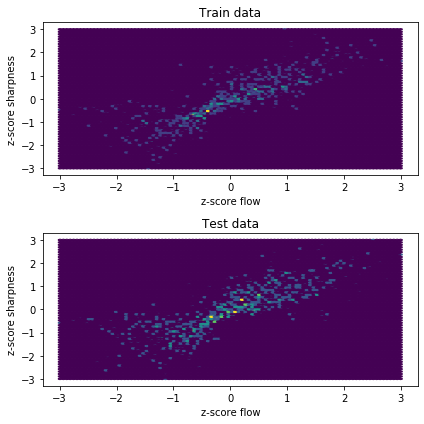

In [14]:
directory = 'matching_interframe/exos'
plots_dir = os.getcwd()
extension = ('.csv')
filepaths = []
for subdir, dirs, files in os.walk(directory):
    files = sorted(files)
    for file in files:
        filepath = subdir + os.sep + file
        if filepath.endswith(extension):
            #filepaths.append(filepath)
            name = (filepath.split('/',1)[1]).split('_stats.csv')[0].replace('/', '_')
            print(name)
            df = pandas.read_csv(filepath)
#df = pandas.concat([pandas.read_csv(f) for f in filepaths])

            df = df.astype(float)
            df.rename(columns = {'blur':'sharpness'}, inplace=True)
            df.dropna(inplace=True)
            df = df[['inliers', 'sharpness', 'flow', 'contrast', 'average intensity', 'percentage white pixels', 'percentage black pixels']]
            df= df.sample(frac=1.0, replace=False, random_state=1)
            midpoint = int(df.shape[0]/2)

            train_df = df.iloc[0:midpoint]
            test_df = df.iloc[-midpoint:]

            # copy the data
            df_z_scaled_train = train_df.copy()
            df_z_scaled_test = test_df.copy()


            # apply normalization techniques
            for column in df_z_scaled_train.columns:
                df_z_scaled_train[column] = (df_z_scaled_train[column] -
                                       df_z_scaled_train[column].mean()) / df_z_scaled_train[column].std()
            for column in df_z_scaled_test.columns:
                df_z_scaled_test[column] = (df_z_scaled_test[column] -
                                       df_z_scaled_test[column].mean()) / df_z_scaled_test[column].std()

            df_z_scaled_train['Percentile_rank_inliers']=df_z_scaled_train['inliers'].rank(pct=True)
            df_z_scaled_train['z_score_inliers'] = norm.ppf(df_z_scaled_train['Percentile_rank_inliers'])

            df_z_scaled_train['Percentile_rank_sharpness']=df_z_scaled_train['sharpness'].rank(pct=True)
            df_z_scaled_train['z_score_sharpness'] = norm.ppf(df_z_scaled_train['Percentile_rank_sharpness'])

            df_z_scaled_train['Percentile_rank_flow']=df_z_scaled_train['flow'].rank(pct=True)
            df_z_scaled_train['z_score_flow'] = norm.ppf(df_z_scaled_train['Percentile_rank_flow'])

            df_z_scaled_train['Percentile_rank_contrast']=df_z_scaled_train['contrast'].rank(pct=True)
            df_z_scaled_train['z_score_contrast'] = norm.ppf(df_z_scaled_train['Percentile_rank_contrast'])

            df_z_scaled_train['Percentile_rank_average_intensity']=df_z_scaled_train['average intensity'].rank(pct=True)
            df_z_scaled_train['z_score_average intensity'] = norm.ppf(df_z_scaled_train['Percentile_rank_average_intensity'])

            df_z_scaled_train['Percentile_rank_white']=df_z_scaled_train['percentage white pixels'].rank(pct=True)
            df_z_scaled_train['z_score_percentage white pixels'] = norm.ppf(df_z_scaled_train['Percentile_rank_white'])

            df_z_scaled_train['Percentile_rank_black']=df_z_scaled_train['percentage black pixels'].rank(pct=True)
            df_z_scaled_train['z_score_percentage black pixels'] = norm.ppf(df_z_scaled_train['Percentile_rank_black'])


            df_z_scaled_test['Percentile_rank_inliers']=df_z_scaled_test['inliers'].rank(pct=True)
            df_z_scaled_test['z_score_inliers'] = norm.ppf(df_z_scaled_test['Percentile_rank_inliers'])

            df_z_scaled_test['Percentile_rank_sharpness']=df_z_scaled_test['sharpness'].rank(pct=True)
            df_z_scaled_test['z_score_sharpness'] = norm.ppf(df_z_scaled_test['Percentile_rank_sharpness'])

            df_z_scaled_test['Percentile_rank_flow']=df_z_scaled_test['flow'].rank(pct=True)
            df_z_scaled_test['z_score_flow'] = norm.ppf(df_z_scaled_test['Percentile_rank_flow'])

            df_z_scaled_test['Percentile_rank_contrast']=df_z_scaled_test['contrast'].rank(pct=True)
            df_z_scaled_test['z_score_contrast'] = norm.ppf(df_z_scaled_test['Percentile_rank_contrast'])

            df_z_scaled_test['Percentile_rank_average_intensity']=df_z_scaled_test['average intensity'].rank(pct=True)
            df_z_scaled_test['z_score_average intensity'] = norm.ppf(df_z_scaled_test['Percentile_rank_average_intensity'])

            df_z_scaled_test['Percentile_rank_white']=df_z_scaled_test['percentage white pixels'].rank(pct=True)
            df_z_scaled_test['z_score_percentage white pixels'] = norm.ppf(df_z_scaled_test['Percentile_rank_white'])

            df_z_scaled_test['Percentile_rank_black']=df_z_scaled_test['percentage black pixels'].rank(pct=True)
            df_z_scaled_test['z_score_percentage black pixels'] = norm.ppf(df_z_scaled_test['Percentile_rank_black'])


            fig, plot = plt.subplots(2, figsize = (6,6))
            plot[0].hexbin(df_z_scaled_train['z_score_flow'], df_z_scaled_train['z_score_sharpness'], bins=50)
            plot[1].hexbin(df_z_scaled_test['z_score_flow'], df_z_scaled_test['z_score_sharpness'], bins=50)

            plot[0].set_title('Train data')
            plot[0].set_xlabel('z-score {a}'.format(a='flow'))
            plot[0].set_ylabel('z-score sharpness')
            plot[1].set_title('Test data')
            plot[1].set_xlabel('z-score {a}'.format(a='flow'))
            plot[1].set_ylabel('z-score sharpness')
            plt.tight_layout()
            plt.savefig('{a}_{b}.png'.format(a=name, b='flow_sharpness'))   
            '''
            for column in df_z_scaled_train.columns:
                if column == 'Percentile_rank_inliers':
                    break
                else:
                    if column != 'inliers':
                        fig, plot = plt.subplots(2, figsize = (6,6))
                        plot[0].hexbin(df_z_scaled_train['z_score_{a}'.format(a=column)], df_z_scaled_train['z_score_inliers'], bins=50)
                        plot[1].hexbin(df_z_scaled_test['z_score_{a}'.format(a=column)], df_z_scaled_test['z_score_inliers'], bins=50)

                        #plot[0].scatter(df_z_scaled_train['z_score_{a}'.format(a=column)], df_z_scaled_train['z_score_inliers'], s=0.001)
                        #plot[1].scatter(df_z_scaled_test['z_score_{a}'.format(a=column)], df_z_scaled_test['z_score_inliers'], s=0.001)
                        plot[0].set_title('Train data')
                        plot[0].set_xlabel('z-score {a}'.format(a=column))
                        plot[0].set_ylabel('z-score inliers')
                        plot[1].set_title('Test data')
                        plot[1].set_xlabel('z-score {a}'.format(a=column))
                        plot[1].set_ylabel('z-score inliers')
                        plt.tight_layout()
                        plt.savefig('{a}_{b}.png'.format(a=name, b=column))
            '''
